***Hello Everyone Welcome to lesson 2. In this module we will learn about how to train a model to identify handwritten digits.***

***We will start by looking at demo***

In [29]:
from IPython.display import HTML
HTML(f"""<video src={"https://drive.google.com/uc?id=146d104jp5G1Y-o6vsZfiWWB7SMavsI6N"} width=500 controls/>""")

***We will start by setting up kaggle and here comes the use of kaggle.json file which I asked you to generate earlier.***

However if anybody haven"t generated that file you can follow the link [Setting up kaggle](https://adityashrm21.github.io/Setting-Up-Kaggle/).
In the above link follow 2nd step i.e Setting up api token and that"s it(You must be having a kaggle account to do this.If you don"t have the one then first create one for you.It"s very simple.

***Step 1***

Upload kaggle.json file

In [1]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


***Step 2***

Setting up environment variables so that kaggle api can work properly.Although it's very simple doing this using the below code but if you can't get it right now it's ok.

In [2]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

***Step 3***

Downloading the required dataset for the particular project.

***Here I have created dataset by myself so there will be no any error in downloading this but Sometimes when we try to download data from a competition it gives error. At that time your first step should be accepting the rules of competition at the particular page of kaggle competition at kaggle website***

***You can notice that I have used ! symbol in starting of command. This is colab specific and should not be used if you are executing in your local linux system. In colab to execute linux commands ! should be included.***

***One more important thing is that guyzzzz everything running on colab will take much effort in converting to work in local windows/ mac /linux systems because I always use a mixture of python and linux commands even in loops. So try to stick to colab***

In [3]:
!kaggle datasets download -d mrviswamitrakaushik/digit-data

 88% 92.0M/105M [00:02<00:00, 32.6MB/s]
100% 105M/105M [00:02<00:00, 49.7MB/s] 


***Step 4***

Unzip downloaded data and booooom you are ready and successfully used kaggle api.

In [4]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Digit_data/8/img514.jpg  
  inflating: Digit_data/8/img5140.jpg  
  inflating: Digit_data/8/img5148.jpg  
  inflating: Digit_data/8/img5150.jpg  
  inflating: Digit_data/8/img5158.jpg  
  inflating: Digit_data/8/img5159.jpg  
  inflating: Digit_data/8/img517.jpg  
  inflating: Digit_data/8/img519.jpg  
  inflating: Digit_data/8/img5193.jpg  
  inflating: Digit_data/8/img5210.jpg  
  inflating: Digit_data/8/img5219.jpg  
  inflating: Digit_data/8/img5223.jpg  
  inflating: Digit_data/8/img5232.jpg  
  inflating: Digit_data/8/img5235.jpg  
  inflating: Digit_data/8/img5259.jpg  
  inflating: Digit_data/8/img5279.jpg  
  inflating: Digit_data/8/img528.jpg  
  inflating: Digit_data/8/img5283.jpg  
  inflating: Digit_data/8/img5285.jpg  
  inflating: Digit_data/8/img5294.jpg  
  inflating: Digit_data/8/img5323.jpg  
  inflating: Digit_data/8/img5327.jpg  
  inflating: Digit_data/8/img534.jpg  
  inflating: Digit_data/8/img5340.

***Exploring the data***

In [5]:
os.listdir("Digit_data")

['0', '1', '7', '8', '6', '3', '2', '9', '4', '5']

***Training Model***

Just importing required libraries and a bit detail about these is discussed in Lesson 1. As I told you arlier Lesson 1 will be there always like your alphabets are always there when you use that language.....

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

***Defining the batch size***

In [7]:
bs=64

***Creating data bunch object and here we are using my favourite format i.e. getting data from folders so that they can be analyzed easily..We should explore our dataformat this time***

***I have setted up do flip=true just to show a little example of data augmentation.So please look at my cell output before you run it by yourself***

In [8]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("Digit_data"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

***Looking at some examples in data***

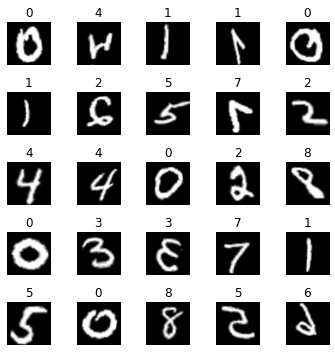

In [9]:
data.show_batch(rows=5, figsize=(5,5))

***Exploring different classes present in data***

In [10]:
print(data.classes)
len(data.classes)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


10

***Creating a model to get trained...***

And here about the paramters like 

***data ***--> databunch we have created(converting data in a format so that it can be trained)

***models.resnet50*** -->resnet50 model will be used  and details are discussed in lesson 1 and after this if you still not getting it it"s fine you will get used to it with the coming lessons but atleast try to understand these concepts by going to previous lessons again so that you can have a better understanding

***metrices*** --> We have talked enough  about this in lesson 1 but just for idea  it don"t have any role in training it just show accuracy after each epoch so that we can see how well our model is doing.

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


***Training the model and look I am aware of some more concepts to increase accuracy but it"s not the part we should focus more because 98.5% we are getting  is itslef is a very good accuracy. So we should not bother about it further***

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.277592,0.155123,0.948214,08:51
1,0.147033,0.083195,0.974643,08:46
2,0.098616,0.050910,0.984048,08:45
3,0.074457,0.047262,0.985952,08:46


***Mounting Google Drive and I know there are also some more simpler ways to mount drive but  I am writing just for the completness of code and anyone who is not aware of other methods should not be stuck here..***

In [13]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


***As I also mentioned it in lesson -1 that we will be using Google drive to save results ***

***So I have created a folder named dl_projects for all projects and in this a subdirectory for each project like in this directory name is digit_recognition so that data related to this project can be found there***

***Also you should do a homework about both function os.mkdir and os.makedirs and their parameters like use of exist_ok=True***

In [14]:
os.makedirs("/content/drive/My Drive/dl_projects/digit_recognition",exist_ok=True)

***Saving our directory path to a variable so that we don"t have to write so long everytime to refer to the directory***

In [15]:
my_dir="/content/drive/My Drive/dl_projects/digit_recognition"

***Saving the state with name as stage-1 in Google drive directory..***

***A bit detail about this  is that It have stored the state of learner now like we have trained and saved the state now it contains all the info even training info so that's pretty useful thing ***

***It"s bit different from the thing called as model we will talk about that some other day..***

In [16]:
learn.save(my_dir+"/Stage-1")

***We can train it further also but just frm inuition or I don"t why I was not interested in training it further so I interuptted the process ***

***You should not  run this during Class time but can experiment it later***

In [ ]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.095036,0.056878,0.982738,09:20


***And that's not  the real reason why I interuptted the previous one Actual I wanted to show that once you saved and stored the thing you can always to move to that state using load function hahahahhhaha***

***Beare of  the fact that you can only skip training process using this if you runtime has expired or you have closed it intentionally then you have to follow evrystep except for two cells having code for training i.e fit_one_cycle and learn.save*** 

***A bit more detail about this is if you run learn.save(stage-1) line again then you save stae will be overwritten and that"s not what you want***

***Don't worry We will dive deep in the details in upcoming lessons***

In [17]:
learn.load("/content/drive/My Drive/dl_projects/digit_recognition/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (33600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,0,0
Path: Digit_data;

Valid: LabelList (8400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
4,2,4,1,8
Path: Digit_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_

***And here is exactly what a thing called model is generated and saved and notce one thing that this model is generated from learn variable itself. So learn varibale is of great use***

In [18]:
learn.export(my_dir+"/export.pkl")

***And here the concept of prediction starts ***

***one interested thing here is that once we trained our model we need only few things to get our model to make predictions for us. I will give you a list and what we need is and why we will be discussed some other day.***

1. fastai library import
2. Our saved model

and that"s it hahahahaha

In [19]:
predictor = load_learner(my_dir)

***making prediction function which accepts a test_image address as input and will return result for us. Beaware we have to provide address of image and not the image itself and why we will discuss some other day hahahahaha***

In [20]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class


***Just leave the below part as untouched this was some experiment portion I will discuss it in upcoming lessons ***
and code below it is not so  much well written but I have genrated video for you using that code..

***Predicting for a single image***

In [21]:
all_test_images=os.listdir("test_data/test_data")

3


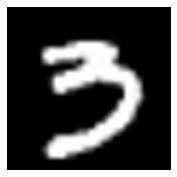

In [22]:
idx=0
print(my_predictor("test_data/test_data/"+all_test_images[idx]))
img = open_image("test_data/test_data/"+all_test_images[idx])
img.show()

***Making Video***

In [23]:
import cv2
test_files=os.listdir("test_data/test_data")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("test_data/test_data/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 2
  color = (255, 0, 0) 
  thickness = 4
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

In [24]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' \-c:v libx264 -r 1 -pix_fmt yuv420p ../my_final_output.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable

In [25]:
!pip install -U kora
from kora.drive import upload_public


In [26]:
url = upload_public('my_final_output.mp4')

In [27]:

from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

In [28]:
url

'https://drive.google.com/uc?id=146d104jp5G1Y-o6vsZfiWWB7SMavsI6N'